## Observations and Insights 

### Scatter Plot Graph

- Fom the **scatter plot graph** we can observe that the *mouse weight* correlated strongly with *average tumor volume*. Therefore correlating only the final tumor volume to efficacy without controlling for mouse weight could skew the interpretation of efficacy.  The heavier the mouse, the less effective the drug is (see scatter plot).

### Box Plot Graph 


**1.** *Capomulin* seems to be comparable to *Ramicane* in effectiveness and it is significantly more effective than *Infubinol* and *Ceftamine*.

**2.** The results of the study are very consistent, thus reliable, as there is only **one outlier** in the data set for the top drugs, and none for Capomulin
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data=pd.merge(mouse_metadata,study_results, how='outer',on= 'Mouse ID')
# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count=mouse_data['Mouse ID'].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data.groupby(['Mouse ID',"Timepoint"])
duplicate_mouse_data = mouse_data[mouse_data.duplicated(['Mouse ID','Timepoint'])]
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_dupicate=mouse_data[mouse_data['Mouse ID']=="g989"]
mouse_data_dupicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data=mouse_data[mouse_data['Mouse ID']!="g989"]
mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(mice_data['Mouse ID'].unique())
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Regimen_mean = mice_data.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
Regimen_median = mice_data.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
Regimen_variance = mice_data.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
Regimen_standard_deviation = mice_data.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
Regimen_sem = mice_data.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']


summary_mice_count= pd.DataFrame({"Mean": Regimen_mean, "Median": Regimen_median, "Variance":Regimen_variance,
                       "Standard Deviation":Regimen_standard_deviation,"SEM":Regimen_sem})
summary_mice_count



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_mice_count= mice_data.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_mice_count


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

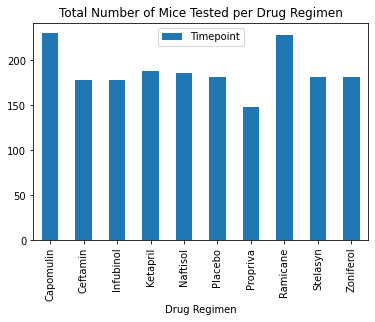

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_bar_data=pd.DataFrame(mice_data.groupby(["Drug Regimen"]).count()).reset_index()

#Reduce number of colums to just show the timepoints
timepoint_bar_data=timepoint_bar_data[["Drug Regimen","Timepoint"]]
timepoint_bar_data
timepoint_bar_data=timepoint_bar_data.set_index("Drug Regimen")
timepoint_bar_data.plot.bar()

#Graph title
plt.title("Total Number of Mice Tested per Drug Regimen")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

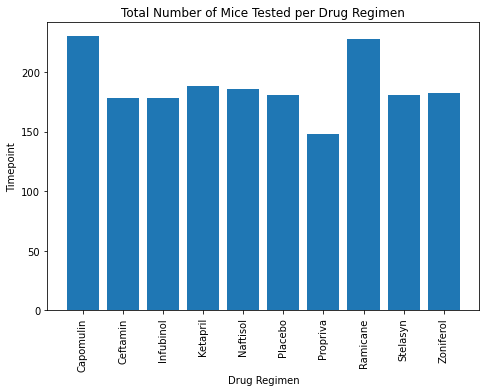

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Regimen= summary_mice_count.index.tolist()
Timepoints= (mice_data.groupby(["Drug Regimen"]) ["Timepoint"].count()).tolist()
Timepoints
ax.bar(Regimen,Timepoints)
ax.set_ylabel("Timepoint")
ax.set_title("Total Number of Mice Tested per Drug Regimen")
ax.set_xlabel("Drug Regimen")
plt.xticks (rotation =90)
plt.show



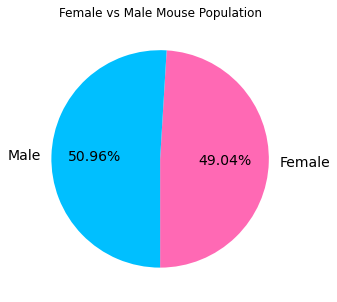

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_type_group=pd.DataFrame(mice_data.groupby(["Sex"]).count()).reset_index()
mouse_type_group=mouse_type_group[["Sex","Mouse ID"]]

plt.figure(figsize=(8,5))
ax1=plt.subplot(aspect="equal")
mouse_type_group.plot(kind="pie",y="Mouse ID", ax=ax1, autopct='%1.2f%%',colors=['hotpink','deepskyblue'],
startangle=270, labels=['Female','Male'], legend=False, fontsize=14)

plt.axis('off')
plt.title('Female vs Male Mouse Population')

plt.show()


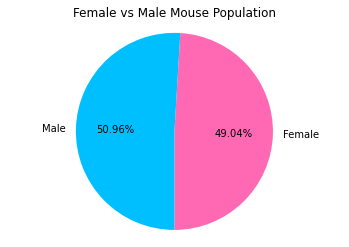

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_type_count=(mice_data.groupby(["Sex"]) ["Weight (g)"].count()).tolist()
plt.pie(mouse_type_count,labels=['Female','Male'],colors=['hotpink','deepskyblue'], autopct='%1.2f%%', startangle=270)
plt.axis("equal")
plt.title('Female vs Male Mouse Population')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
list_treatment=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
treatment_results = mice_data.loc[mice_data['Drug Regimen'].isin(list_treatment)]

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=treatment_results.groupby(treatment_results['Mouse ID']).agg({'Timepoint':['max']})
greatest_timepoint.columns = ['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint = greatest_timepoint.reset_index()
final_tumor_volume = pd.merge(greatest_timepoint, mice_data, how="left", on=["Mouse ID", "Timepoint"])
final_tumor_volume



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatment=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in list_treatment:
    tumor_volumen_by_treatment=final_tumor_volume['Tumor Volume (mm3)'].loc[final_tumor_volume['Drug Regimen']==treatment]
    
# add subset 
    tumor_volume.append(tumor_volumen_by_treatment)

# Determine outliers using upper and lower bounds

    quartiles =tumor_volumen_by_treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f' for {treatment},Interquartile Range (IQR) is {iqr}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f' for {treatment},values below {lower_bound} could be outliers')
    print(f' for {treatment},values above {upper_bound} could be outliers')



 for Capomulin,Interquartile Range (IQR) is 7.781863460000004
 for Capomulin,values below 20.70456164999999 could be outliers
 for Capomulin,values above 51.83201549 could be outliers
 for Ramicane,Interquartile Range (IQR) is 9.098536719999998
 for Ramicane,values below 17.912664470000003 could be outliers
 for Ramicane,values above 54.30681135 could be outliers
 for Infubinol,Interquartile Range (IQR) is 11.477135160000003
 for Infubinol,values below 36.83290494999999 could be outliers
 for Infubinol,values above 82.74144559000001 could be outliers
 for Ceftamin,Interquartile Range (IQR) is 15.577752179999997
 for Ceftamin,values below 25.355449580000002 could be outliers
 for Ceftamin,values above 87.66645829999999 could be outliers


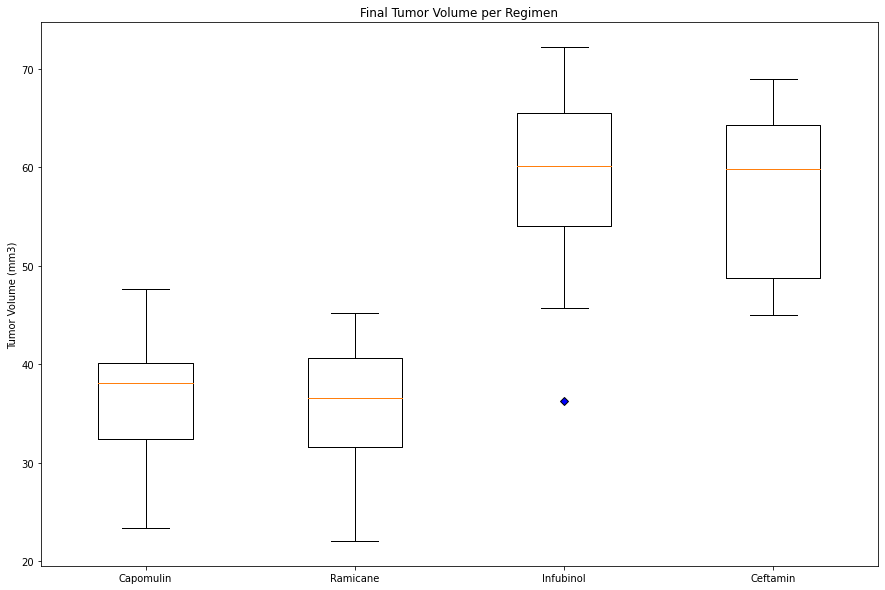

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots (figsize=(15,10))
blue_diamond = dict(markerfacecolor='b', marker='D')
ax.set_title('Final Tumor Volume per Regimen')
# ax.set_xticklabels(list_treatment)
ax.set_ylabel('Tumor Volume (mm3)')
ax.boxplot(tumor_volume,labels=list_treatment,flierprops=blue_diamond )
plt.show()


## Line and Scatter Plots

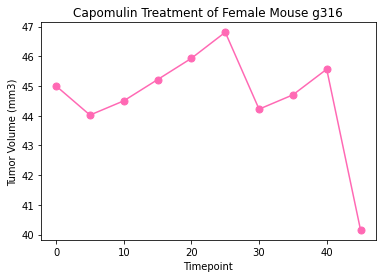

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_results_capomulin = mice_data.loc[mice_data["Mouse ID"]=="g316",:]
mouse_results_capomulin

x_axis=mouse_results_capomulin["Timepoint"]
y_axis=mouse_results_capomulin["Tumor Volume (mm3)"]

plt.title('Capomulin Treatment of Female Mouse g316')
plt.plot(x_axis, y_axis,color="hotpink",markersize=7,marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show(block=False)
plt.show()


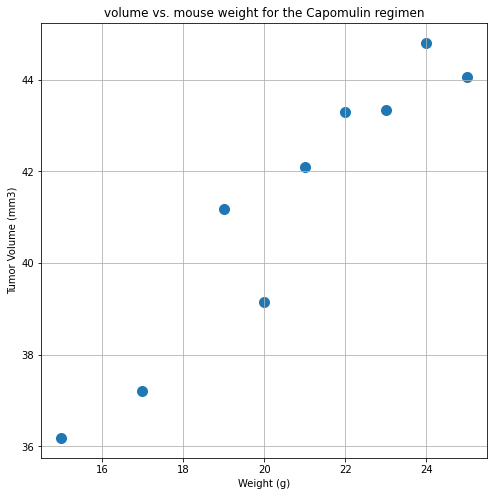

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# scatter_plot_capomulin=pd.DataFrame({"Mouse ID","Weight (g)"},index=["Drug Regimen"])
mouse_weight_capomulin= mice_data.loc[:,['Drug Regimen','Mouse ID','Weight (g)','Tumor Volume (mm3)']]
mouse_weight_capomulin=mouse_weight_capomulin[mouse_weight_capomulin["Drug Regimen"].isin(['Capomulin'])]
#get the average volumen 
averagevol=pd.DataFrame(mouse_weight_capomulin.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index())
averagevol
averagevol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),s=100,
              title= "volume vs. mouse weight for the Capomulin regimen");

## Correlation and Regression

In [23]:
#Data to work with
averagevol
averagevol.columns =['Weight','average_tumor_volume']
averagevol


,Weight,average_tumor_volume
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


The correlation between weight and average tumor volume is 0.95.


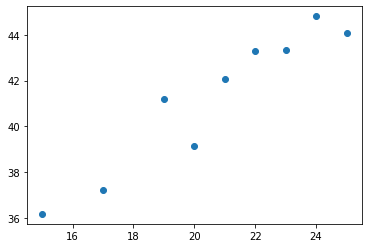

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#insolate Variables
weight = averagevol["Weight"]
average_tumor_volume = averagevol["average_tumor_volume"]

#Calculate the correlation coefficiaent
correlation=st.pearsonr(weight,average_tumor_volume)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}.")

# Create the variables for linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight
y_values = average_tumor_volume
plt.scatter(x_values,y_values)

plt.xlabel = 'weight'
plt.ylabel = 'average_Tumor_Volume'
plt.show()


Predicted y is 36.18581912960284 vs an actual value of 36.182039562


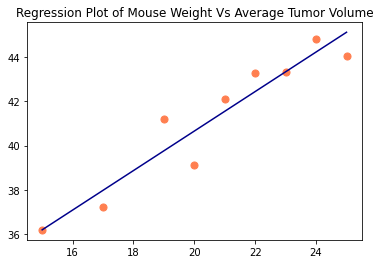

In [21]:
#add the linear regression equation and line to plot 
x_values = weight
y_values = average_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y=mx+b
y=slope*x_values[0]+intercept
print(f'Predicted y is {y} vs an actual value of {y_values[0]}')

# Calculate regress values, r-squared, etc

regress_values = x_values * slope + intercept
plt.title("Regression Plot of Mouse Weight Vs Average Tumor Volume")
plt.xlabel='mouse weight'
plt.ylabel='average_tumor_volume'
plt.scatter(x_values,y_values,color='coral',s=50)
plt.plot(x_values,regress_values,color='darkblue')


plt.show()